# Exercise Week 1 – Individual
Name: Mirang Bhandari <br>
Matriculation Number: 100007049

# 0. Import the Iris Dataset

In [2]:
import pandas as pd

iris = pd.read_csv('Iris_Dataset/Iris_Dataset_container/iris.csv')
print(iris.head(), "\n")

print(iris.nunique(), "\n")# Print unique iis values to check for different categories

print(iris['species'].unique(), "\n") # Print the unique species in the dataset


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64 

['setosa' 'versicolor' 'virginica'] 



# 1. Descriptive Statistics
Compute mean, median, and standard deviation of sepal length, grouped by species
Identify which species shows the highest variability

Question: Identify which species shows the highest variability

In [3]:
mean_sepal = iris.groupby('species')['sepal_length'].mean() # Group the data by species and calculate the mean sepal length for each species
print(mean_sepal)

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64


Group species accordingly and Compute Median for speal_length respectively

In [4]:
median_sepal = iris.groupby('species')['sepal_length'].median()
print(median_sepal) # Group the data by species and calculate the median sepal length for each species

species
setosa        5.0
versicolor    5.9
virginica     6.5
Name: sepal_length, dtype: float64


Group species accordingly and Compute Standard Deviation for speal_length respectively

In [5]:
std = iris.groupby('species')['sepal_length'].std()
print(std) # Group the data by species and calculate the standard deviation of sepal length for each species

species
setosa        0.352490
versicolor    0.516171
virginica     0.635880
Name: sepal_length, dtype: float64


### As **Virginica** has the highest variation of values (i.e., the highest standard deviation), it is clear that the Virginica species has the highest variability.


# 2. Central Tendency & Dispersion


For petal length (per species), we need to compute 
1. mean
2. median, 
3. mode (if any)
4. variance
5. standard deviation

Question: Explain briefly:
When does the median tell a different story than the mean?

In [6]:
mean_petal_length = iris.groupby('species')['petal_length'].mean()
print(mean_petal_length)

species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


## Median

In [7]:
median_petal_length = iris.groupby('species')['petal_length'].median()
print(median_petal_length)

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64


## Mode

In [8]:
mode_petal_length = iris.groupby('species')['petal_length'].apply(lambda x: x.mode()[0]) # As Mode is seperate for each species group we need to apply mode propery seperately and also consider edge case of multiple modes and send first best mode
print(mode_petal_length)

species
setosa        1.5
versicolor    4.5
virginica     5.1
Name: petal_length, dtype: float64


## Variance

In [9]:
variance_petal_length = iris.groupby('species')['petal_length'].var()
print(variance_petal_length)

species
setosa        0.030106
versicolor    0.220816
virginica     0.304588
Name: petal_length, dtype: float64


In [10]:
std_petal_length = iris.groupby('species')['petal_length'].std()
print(std_petal_length)

species
setosa        0.173511
versicolor    0.469911
virginica     0.551895
Name: petal_length, dtype: float64


Question: Explain briefly:

When does the median tell a different story than the mean?

Answer: The median tells a different story than the mean when the data contains extreme values or is highly skewed. In such cases, the mean can be pulled towards unusually large or small values, while the median provides the true middle of the distribution, giving a more accurate measure of central tendency. **Note:  in our dataset as variation in values isn't as high the mean and median values hover at the same level.**

# 3. Visualization
1. Plot a histogram of petal width (all species combined) <br>
2. Create a boxplot of sepal length, grouped by species

Question: Which plot better shows between-species differences, and why?

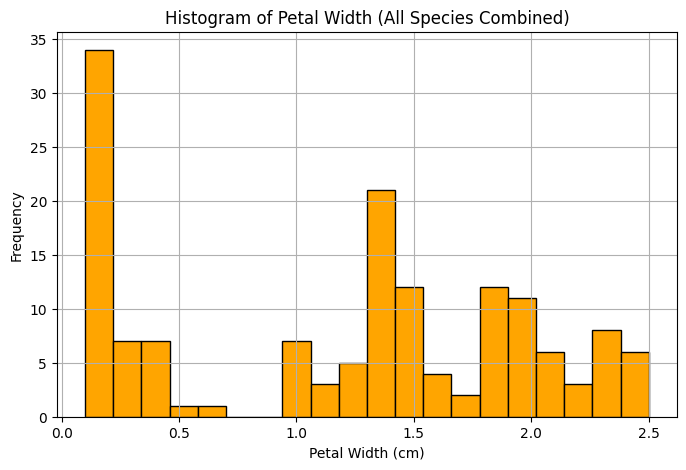

In [11]:
import matplotlib.pyplot as plt #Import matplot lib to customize the canvas

plt.figure(figsize=(8,5)) # Set canvas Width and height to 8 and 5 respectively
iris['petal_width'].hist(bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Petal Width (All Species Combined)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()


<Figure size 600x400 with 0 Axes>

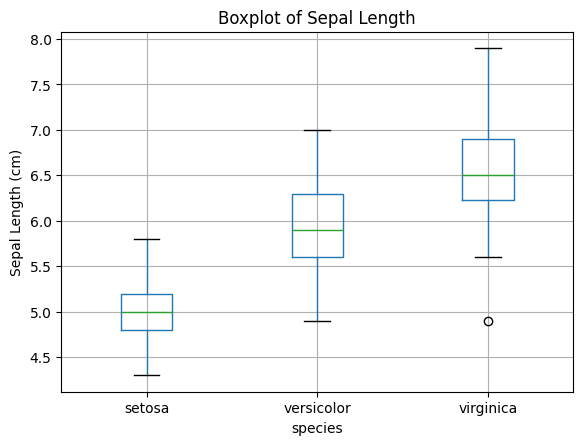

In [12]:
plt.figure(figsize=(6,4))
iris.boxplot(column='sepal_length', by='species')
plt.title('Boxplot of Sepal Length')
plt.suptitle('') 
plt.ylabel('Sepal Length (cm)')
plt.show()

Question: Which plot better shows between-species differences, and why?

Answer: **The Boxplot** better shows between-species differences because it separates each species visually and highlights median, spread, and outliers. The histogram combines all species, so it hides which values belong to which species

# 4. Distributions & Skewness <br>

1. Compute skewness of petal length for each species <br>

Identify:<br>
2. Most positively skewed <br>
3. Most negatively skewed <br>
4. Provide a short interpretation

4.1. Compute skewness of petal length for each species


In [15]:
skew_petal_length = iris.groupby('species')['petal_length'].skew()
print(skew_petal_length, "\n")

species
setosa        0.071846
versicolor   -0.606508
virginica     0.549445
Name: petal_length, dtype: float64 



2. Most positively skewed <br>
3. Most negatively skewed <br>

In [16]:
print("Most Positvely Skewed", max(skew_petal_length))
print("Most Negatively Skewed", min(skew_petal_length))

Most Positvely Skewed 0.5494445890270077
Most Negatively Skewed -0.6065076894906244


# 5. Sampling & Central Limit Theorem (Mini Task)
Take 100 random samples of size n = 20 from sepal length

Store the sample means

Plot: 

1. Histogram of the sample means

2. Histogram of the original sepal length

3. Compare the two distributions (1–2 lines)

Take 100 random samples of size n = 20 from sepal length

Store the sample means

In [ ]:
import numpy as np # as random can be used with numpy only

sepal_length = iris['sepal_length']
np.random.seed(30)
sample_means = []
n = 20

for i in range(100): # loop 100 times for 100 random samples of size 20 
    sample = np.random.choice(sepal_length, n, replace = True) # Randomly choose 20 elements from sepal length defined by seed 30
    sample_mean = sample.mean()
    sample_means.append(sample_mean) 
    
print(sample_means)

[np.float64(6.0649999999999995), np.float64(5.824999999999998), np.float64(5.59), np.float64(5.784999999999999), np.float64(6.265), np.float64(5.869999999999999), np.float64(6.180000000000001), np.float64(5.755), np.float64(5.6899999999999995), np.float64(6.025), np.float64(5.610000000000001), np.float64(5.6899999999999995), np.float64(5.805), np.float64(5.779999999999999), np.float64(5.640000000000001), np.float64(6.015000000000001), np.float64(5.959999999999999), np.float64(5.8549999999999995), np.float64(6.215000000000001), np.float64(5.67), np.float64(5.7299999999999995), np.float64(5.84), np.float64(6.144999999999999), np.float64(5.875), np.float64(5.630000000000001), np.float64(5.749999999999999), np.float64(5.735), np.float64(5.75), np.float64(5.790000000000001), np.float64(5.825), np.float64(6.015000000000001), np.float64(5.795), np.float64(5.79), np.float64(5.91), np.float64(6.1850000000000005), np.float64(5.42), np.float64(5.585), np.float64(6.055), np.float64(6.0400000000000


## 5.1 Histogram of the sample means

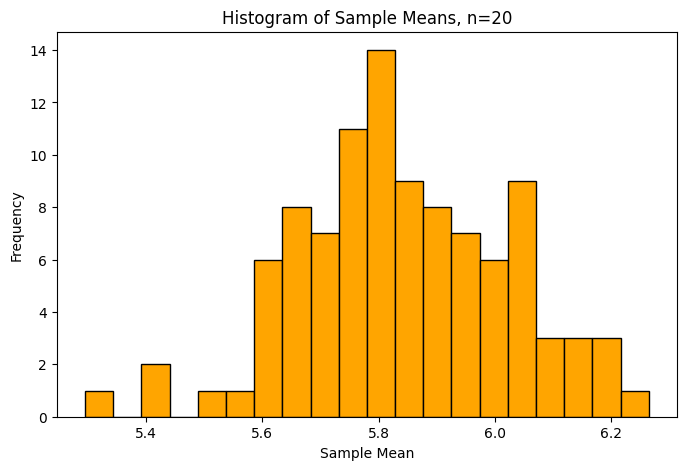

In [ ]:
import matplotlib.pyplot as plt1 #Import matplot lib to customize the canvas

plt1.figure(figsize=(8,5)) # Set canvas Width and height to 8 and 5 respectively
plt1.hist(sample_means, bins=20, color='orange', edgecolor='black')
plt1.title('Histogram of Sample Means, n=20')
plt1.xlabel('Sample Mean')
plt1.ylabel('Frequency')
plt1.show()

## 5.2. Histogram of the original sepal length

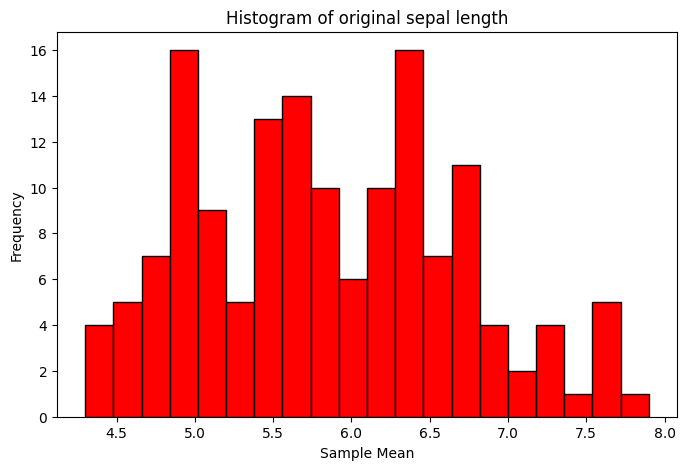

In [ ]:
import matplotlib.pyplot as plt2 #Import matplot lib to customize the canvas

plt2.figure(figsize=(8,5)) # Set canvas Width and height to 8 and 5 respectively
plt2.hist(sepal_length, bins=20, color='red', edgecolor='black')
plt2.title('Histogram of original sepal length')
plt2.xlabel('Sample Mean')
plt2.ylabel('Frequency')
plt2.show()

## 5.3. Compare the two distributions (1–2 lines)

The **sample means** form a bell-shaped curve centered around 5.8, while the **original sepal length** data shows two distinct peaks and spreads across a much wider range. This shows how averaging samples creates a more truer distribution even when the original data isn't normally distributed, therby we can estimate a more precise average value for our dataset.

## 6. Compute Pearson Correlation (r)

Compute the Pearson correlation coefficient between:
- **Sepal length**
- **Petal length**

### Determine the relationship
State whether the relationship is:
- Positive
- Negative
- None

### Plot
- Create a **scatter plot**
- Add a **best-fit line**

In [7]:
pearson_cor = iris["sepal_length"].corr(iris["petal_length"], method = "pearson", min_periods=1)
print(pearson_cor)

0.8717541573048718


Question: State whether the relationship is Positive, Negative, None <br>
Answer: The relationship is positive indicating that as sepal length increases petal will also increase and they do so in a fairly consistent manner

### Plot
- Create a **scatter plot**
- Add a **best-fit line**

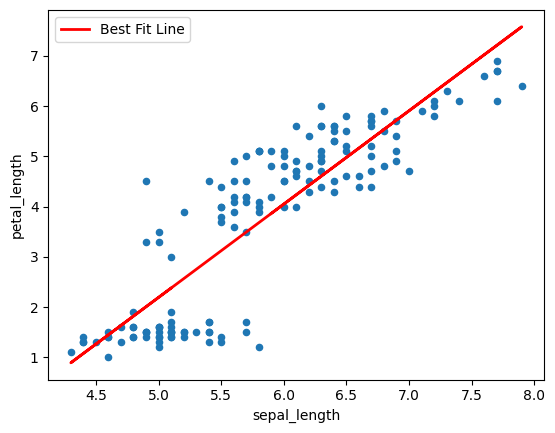

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris.plot.scatter(x="sepal_length", y="petal_length") # Create Scatter plot using pandas

# Add best fit line
x = iris["sepal_length"] # Store sepal length and petal length in x and y respectively
y = iris["petal_length"]
z = np.polyfit(x, y, 1)  # Calculate slope and intercept for best fit line using numpy
p = np.poly1d(z)  # Create polynomial function as current value is of form [slope,intercept]

# Plot the line
plt.plot(x, p(x), "r-", linewidth=2, label='Best Fit Line') # use x values and generate y values from the created polynomial p and plot points, also lets use "r-" which means red line, additionally also assign a label
plt.legend() # show the legend based on our plot via matpotlib  
plt.show() # show the canvas

# 7. Hypothesis Testing: t-Test (2 Groups)
Test whether Setosa and Versicolor have the same mean petal length

Report: t-statistic, p-value

Provide a one-line conclusion

In [17]:
from scipy import stats

# Get petal lengths for each species
setosa_petal = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal = iris[iris['species'] == 'versicolor']['petal_length']

# Perform t-test
t_stat, p_val = stats.ttest_ind(setosa_petal, versicolor_petal) # Call T-Test function from Scipy for t_stat and p value

# Results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")
print(f"\nConclusion: Setosa and Versicolor have significantly different mean petal lengths as p value is very very small < 0.05.")

t-statistic: -39.4687
p-value: 0.000000

Conclusion: Setosa and Versicolor have significantly different mean petal lengths as p value is very very small < 0.05.


# 8. Hypothesis Testing: ANOVA (3 Groups)
Test whether petal width differs across:

Setosa
Versicolor
Virginica

Report:
F-statistic
p-value

Provide a one-line conclusion

In [ ]:
from scipy import stats

# Get petal width for each species
setosa_width = iris[iris['species'] == 'setosa']['petal_width']
versicolor_width = iris[iris['species'] == 'versicolor']['petal_width']
virginica_width = iris[iris['species'] == 'virginica']['petal_width']

# Perform ANOVA
f_stat, p_val = stats.f_oneway(setosa_width, versicolor_width, virginica_width) # Utilize F_oneway function which calculate values for more than two groups

# Results
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.6f}")
print(f"\nConclusion: Petal width differs significantly across the three species as F-statistic value is very large and p value is  very small, i.e < 0.05.")

F-statistic: 959.3244
p-value: 0.000000

Conclusion: Petal width differs significantly across the three species as F-statistic value is very large and p value is yet again very small, i.e < 0.05.
